# Module 1: Data Science Fundamentals

## Sprint 3: Intro to Modeling

## Spotify Challenge

<div><img style="width: 100%; " src="https://upload.wikimedia.org/wikipedia/commons/1/14/Iyyaka_Nastain_QR-Code_Spotify_Black.png" /></div>

## Background

For our sprint's project, we'll analyze some popular songs from Spotify. The dataset contains a number of variables that describe the songs, which we'll use to predict which genre it belongs to. 

---------

## How to start?

Download the dataset [from Kaggle](https://www.kaggle.com/insiyeah/musicfeatures) (`data.csv`) and read it. You should start by performing basic EDA on it. Afterwards, follow the requirements.

## Concepts to explore

We will use dimensionality reduction, do some clustering with K-means and perform modeling using logistic regression.

Look into the follow concepts, which will help you when modelling:
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
- [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

## Requirements

* Perform basic EDA.
* Perform dimensionality reduction on song features, verify data separability by genre (PCA and/or t-SNE).
* Infer genre using song features with logistic regression.
* Cluster songs by features. Generate lists of 5 of similar songs. Verify their similarity by actually listening to some of cluster items on Youtube / Spotify / any other streaming platform.

# Data Preprocessing

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score,silhouette_score, calinski_harabasz_score, classification_report, precision_score, recall_score, f1_score

## Messy Data, missing data and Outliers

In [37]:
dataset = pd.read_csv("https://raw.githubusercontent.com/komus/Monetha-Task/master/data.csv")


In [38]:
dataset.isnull().values.any()

False

In [39]:
dataset.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

The dataset has no null values

### Tempo distribution
Tempo is the speed at which a passage of music is played. Typically, tempo is measured according to beats per minute (bpm).  
https://www.musical-u.com/learn/rhythm-tips-for-identifying-music-genres-by-ear/

The Tempo distribution is a Gaussian distribution. Disco genre peaks around 125BPM

Text(0.5, 0, 'Tempo')

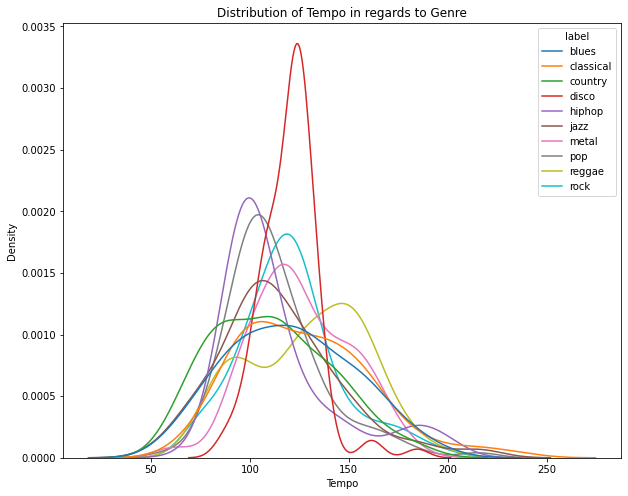

In [40]:
temp_genre = dataset[['label','tempo','filename']]

temp = temp_genre.pivot(index = 'filename', columns='label', values='tempo')
plt.figure(1, figsize=(10,8))
sns.kdeplot(data = temp)
plt.title("Distribution of Tempo in regards to Genre")
plt.xlabel("Tempo")


In [41]:
temp_genre['tempo'].mean()

119.60170189683195

### Beats
The unit division of musical time is called a beat. Just as one is aware of the body’s steady pulse, or heartbeat, so in composing, performing, or listening to music one is aware of a periodic succession of beats.

Text(0.5, 0, 'Beats')

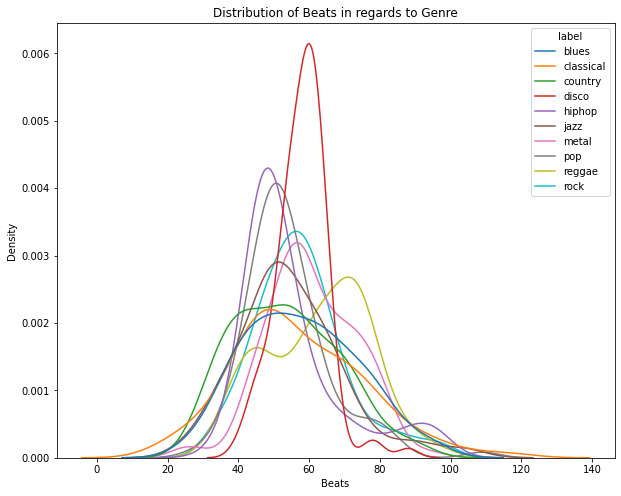

In [42]:
beats_genre = dataset[['label','tempo','filename', 'beats']]

beats = beats_genre.pivot(index = 'filename', columns='label', values='beats')
plt.figure(1, figsize=(10,8))
sns.kdeplot(data = beats)
plt.title("Distribution of Beats in regards to Genre")
plt.xlabel("Beats")

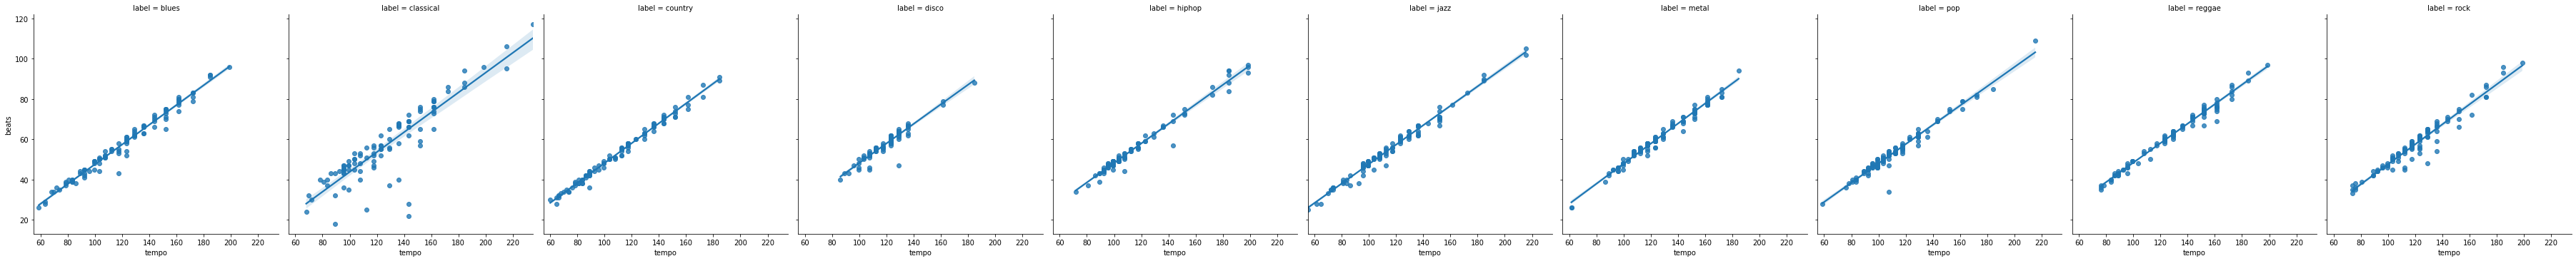

In [43]:
sns.lmplot(x="tempo", y="beats", col = "label", data=beats_genre)

The density distribution of tempo and beats looks similar. In simple terms, tempo is how fast or slow a piece of music is performed, while rhythm is the placement of sounds in time, in a regular and repeated pattern. Tempo is measured in beats per min

### Spectral centroid

The spectral centroid is a measure used in digital signal processing to characterise a spectrum. It indicates where the center of mass of the spectrum is located.Because the spectral centroid is a good predictor of the "brightness" of a sound, it is widely used in digital audio and music processing as an automatic measure of musical timbre

https://www.sciencedirect.com/topics/engineering/spectral-centroid

Text(0.5, 0, 'Spectral Centroid')

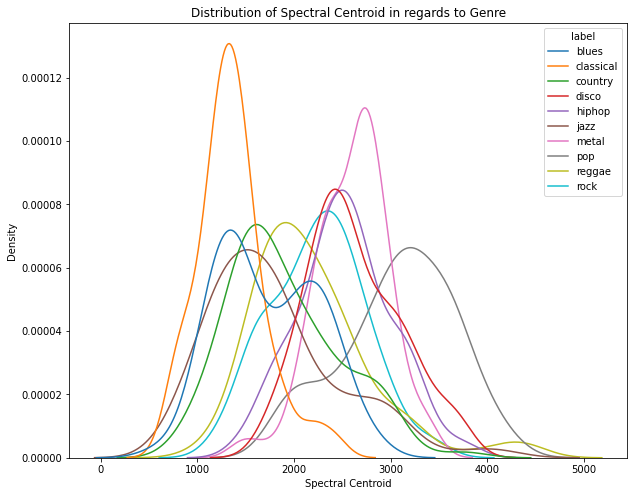

In [44]:
spectral_centroid_genre = dataset[['label','spectral_centroid','filename', 'tempo']]

spectral_centroid = spectral_centroid_genre.pivot(index = 'filename', columns='label', values='spectral_centroid')
plt.figure(1, figsize=(10,8))
sns.kdeplot(data = spectral_centroid)
plt.title("Distribution of Spectral Centroid in regards to Genre")
plt.xlabel("Spectral Centroid")

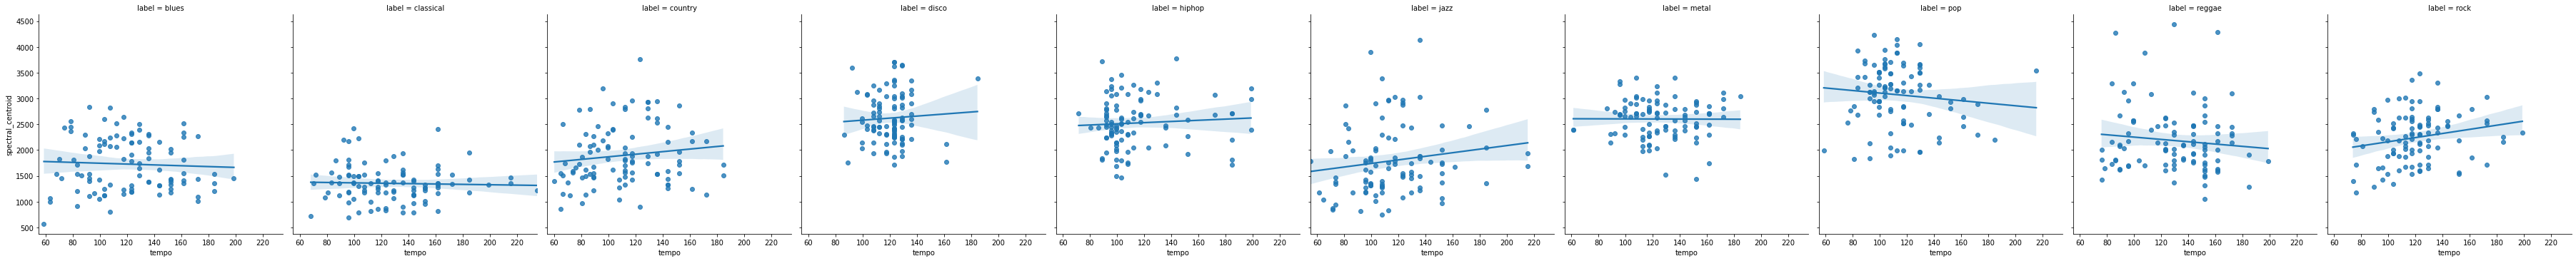

In [45]:
sns.lmplot(x="tempo", y="spectral_centroid", col = "label", data=spectral_centroid_genre)

Text(0.5, 1.0, 'Dataset Correlation')

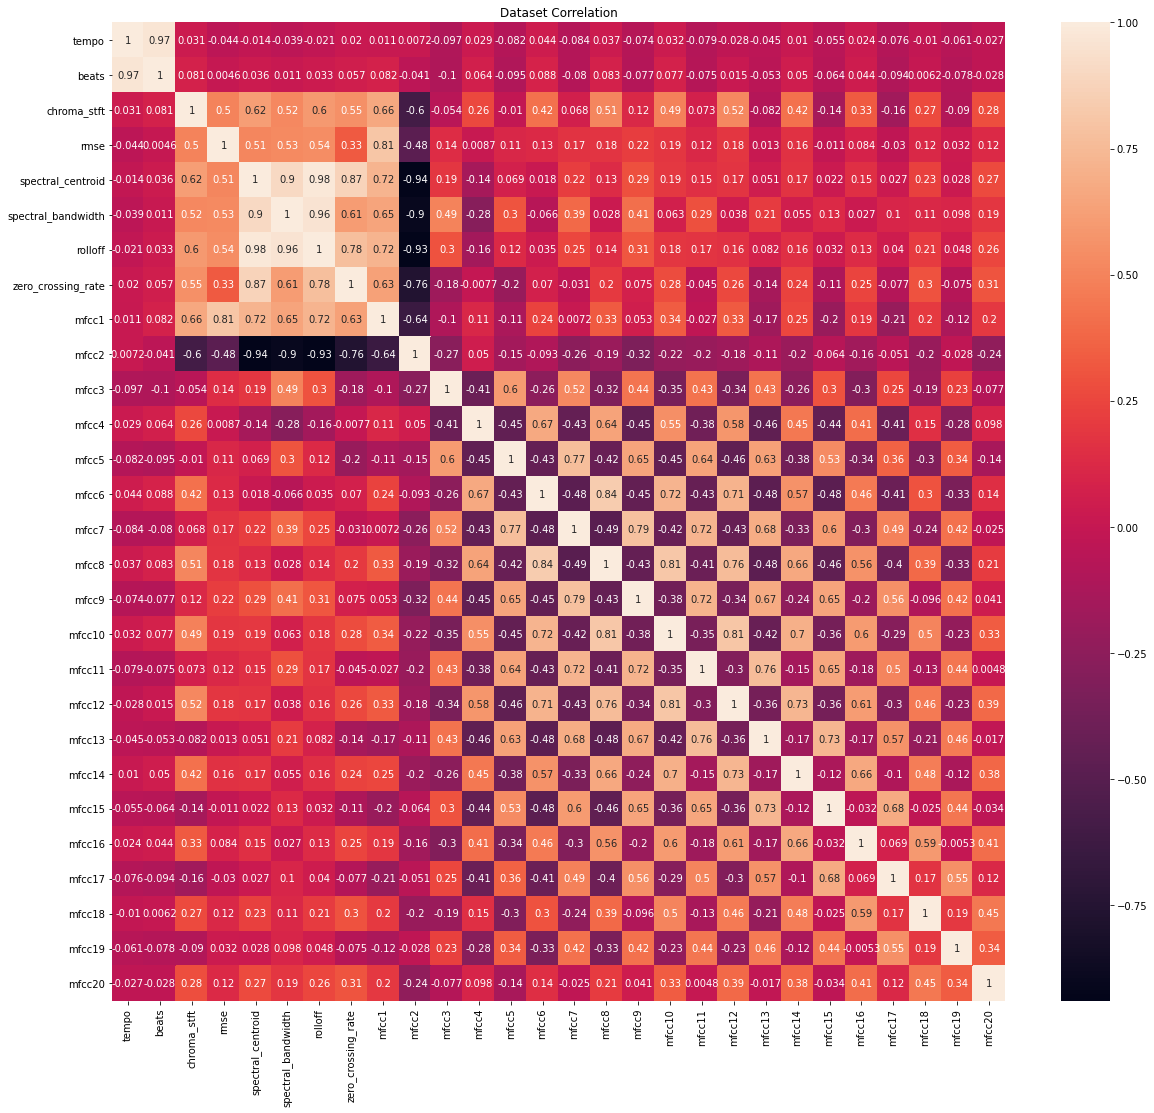

In [46]:
plt.figure(1, figsize=(20,18))
sns.heatmap(dataset.corr(), annot= True)
plt.title("Dataset Correlation")

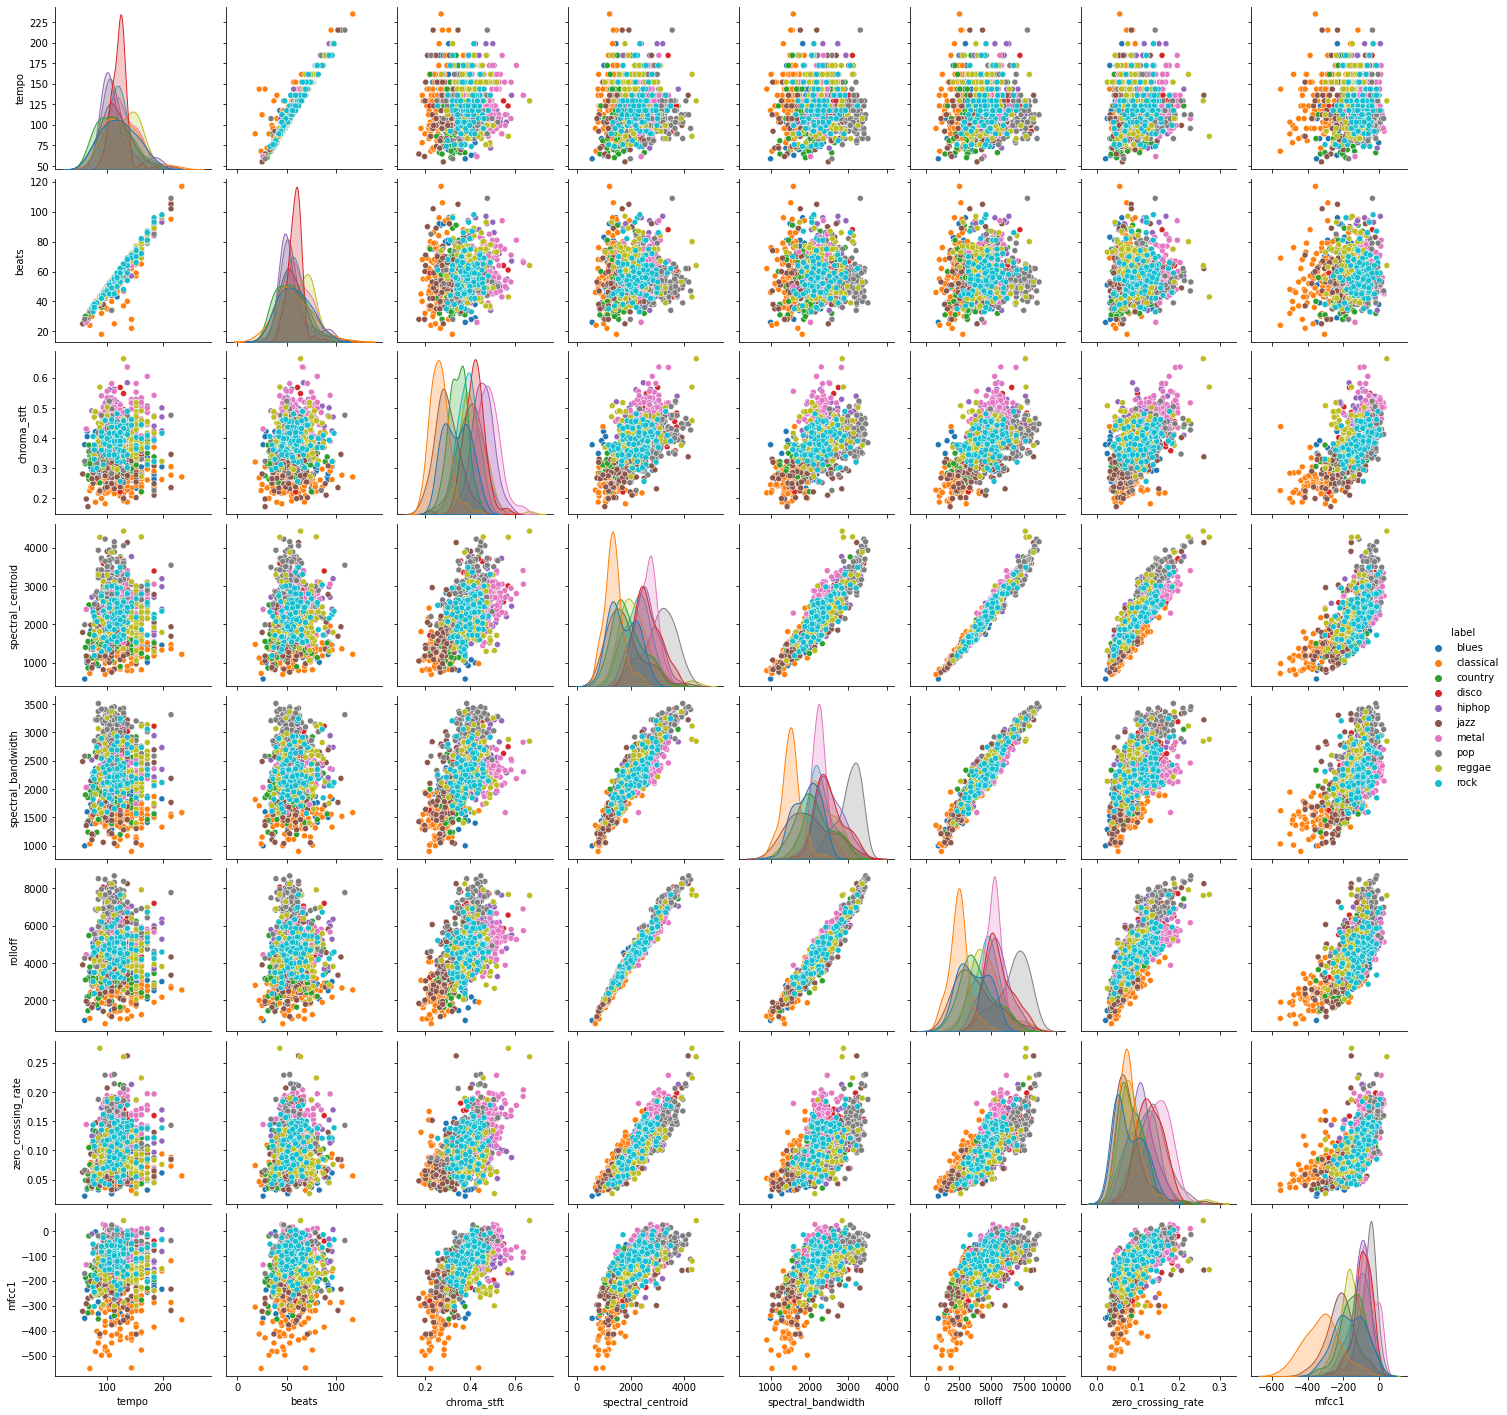

In [47]:
data = dataset[['label','tempo','beats','chroma_stft', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1']]
sns.pairplot(data, hue="label")

## Feature Engineering - Label Encoder

Here, the categorical data "label" will be converted to numerical

In [48]:
target = dataset['label']
features = dataset.drop(['label','filename'], axis=1)

enc_target = pd.Series(LabelEncoder().fit_transform(target.astype('str'))).to_frame()
enc_target.value_counts()

9    100
8    100
7    100
6    100
5    100
4    100
3    100
2    100
1    100
0    100
dtype: int64

## Feature Scaling - Rescaling Data

Standardization of features

In [49]:
scalar = StandardScaler()
scalar.fit(features)
scaled_features = scalar.transform(features)

# Dimension Reduction


## PCA

Reduce the dimension of the dataset using PCA

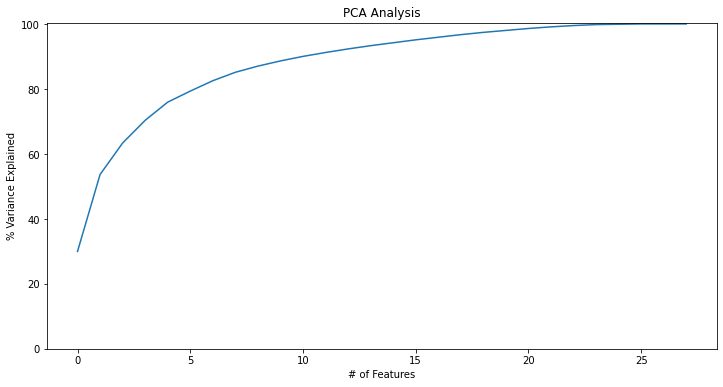

In [50]:
n_number = scaled_features.shape[1]
pca = PCA(n_components=n_number)
pca.fit(scaled_features)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [51]:
pca_s = PCA(n_components=5)
pca_scaled_feature = pca_s.fit_transform(scaled_features)
pca_s.explained_variance_ratio_

array([0.30015603, 0.23734956, 0.09719003, 0.0695376 , 0.05551449])

In [52]:
pca_scaled_feature_d = pd.DataFrame(pca_scaled_feature, columns=['pc1','pc2','pc3','pc4','pc5'])

## T-SNE

Reduce Domensionality by T-SNE

In [53]:
tsne = TSNE(n_components=3)
tsne_scaled_features = tsne.fit_transform(scaled_features)

In [54]:
tsne_scaled_features_d = pd.DataFrame(tsne_scaled_features, columns=['tsne1', 'tsne2', 'tsne3'])

# Modelling

In [55]:
def cluster_accuracy(data, pred_data, target):
  sil = silhouette_score(data, pred_data, metric='euclidean')
  cal = calinski_harabasz_score(data, pred_data)

  return sil, cal

In [56]:
def logistic_accuracy(y_true, y_pred):
  return accuracy_score(y_true, y_pred),precision_score(y_true, y_pred, average='weighted'), recall_score(y_true, y_pred, average='weighted'), f1_score(y_true,y_pred, average='weighted')

## Logistic Regression

### Logistic Regression without Scaling

In [57]:
x_train, x_test, y_train, y_test = train_test_split(features,enc_target,test_size = 0.1)

In [58]:
lg = LogisticRegression(max_iter=600)
lg.fit(x_train, y_train.values.ravel())
lg_pred = lg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [59]:
lg_score = logistic_accuracy(y_test, lg_pred)

In [60]:
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.93      0.93      0.93        14
           2       0.40      0.50      0.44         8
           3       0.00      0.00      0.00         5
           4       0.42      0.44      0.43        18
           5       0.60      0.43      0.50         7
           6       0.46      1.00      0.63         6
           7       0.44      1.00      0.62         4
           8       0.55      0.38      0.44        16
           9       0.20      0.09      0.13        11

    accuracy                           0.50       100
   macro avg       0.46      0.52      0.46       100
weighted avg       0.50      0.50      0.48       100



### Logistic Regression without dimension reduction but scaled

In [61]:
features_train, features_test, target_train, target_test = train_test_split(scaled_features,enc_target,test_size = 0.1)

In [62]:
logreg = LogisticRegression(max_iter=600)
logreg.fit(features_train, target_train.values.ravel())
logreg_pred = logreg.predict(features_test)
logreg_score = logistic_accuracy(target_test, logreg_pred)

In [63]:
print(classification_report(target_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.75      0.86      0.80         7
           2       0.89      0.67      0.76        12
           3       0.69      0.69      0.69        13
           4       0.60      0.55      0.57        11
           5       0.50      0.71      0.59         7
           6       0.82      0.82      0.82        11
           7       0.90      1.00      0.95         9
           8       0.44      0.57      0.50         7
           9       0.50      0.36      0.42        11

    accuracy                           0.69       100
   macro avg       0.68      0.70      0.69       100
weighted avg       0.70      0.69      0.69       100



### Logisic Regression with PCA

In [64]:
features_train_pca, features_test_pca, target_train_pca, target_test_pca = train_test_split(pca_scaled_feature_d,enc_target,test_size = 0.1)

In [65]:
logreg_pca = LogisticRegression()
logreg_pca.fit(features_train_pca, target_train_pca.values.ravel())
logreg_pred_pca = logreg_pca.predict(features_test_pca)
log_pca = logistic_accuracy(target_test_pca,logreg_pred_pca)

In [66]:
print(classification_report(target_test_pca, logreg_pred_pca))

              precision    recall  f1-score   support

           0       0.17      0.06      0.09        16
           1       0.91      0.91      0.91        11
           2       0.21      0.43      0.29         7
           3       0.25      0.18      0.21        11
           4       0.56      0.50      0.53        10
           5       0.33      0.40      0.36        10
           6       0.44      0.73      0.55        11
           7       0.54      0.88      0.67         8
           8       0.40      0.18      0.25        11
           9       0.00      0.00      0.00         5

    accuracy                           0.42       100
   macro avg       0.38      0.43      0.39       100
weighted avg       0.39      0.42      0.39       100



### Logistic Regression with T-SNE

In [67]:
features_train_tsne, features_test_tsne, target_train_tsne, target_test_tsne = train_test_split(tsne_scaled_features_d,enc_target,test_size = 0.1)

In [68]:
logreg_tsne = LogisticRegression(max_iter=600)
logreg_tsne.fit(features_train_tsne, target_train_tsne.values.ravel())
logreg_pred_tsne = logreg_tsne.predict(features_test_tsne)
log_tsne = logistic_accuracy(target_test_tsne, logreg_pred_tsne)

In [69]:
print(classification_report(target_test_tsne, logreg_pred_tsne))

              precision    recall  f1-score   support

           0       0.15      0.25      0.19         8
           1       0.85      1.00      0.92        11
           2       0.17      0.09      0.12        11
           3       0.00      0.00      0.00         8
           4       0.18      0.22      0.20         9
           5       0.08      0.08      0.08        12
           6       0.33      0.67      0.44         9
           7       0.54      0.64      0.58        11
           8       0.50      0.38      0.43         8
           9       0.00      0.00      0.00        13

    accuracy                           0.33       100
   macro avg       0.28      0.33      0.30       100
weighted avg       0.28      0.33      0.30       100



## K - Means


### Kmeans without dimension reduction but scaled data

In [70]:
km_s = KMeans(n_clusters=10,init='k-means++', random_state=42)
km_s.fit(scaled_features)
labels_km_scale = km_s.labels_
y_km_s = km_s.predict(scaled_features)
kmeans_score_s  = cluster_accuracy(scaled_features,y_km_s, enc_target)
kmeans_score_s

(0.12298876911272688, 142.48997421422877)

### K means with PCA

In [71]:
km_cluster = KMeans(n_clusters=10,init='k-means++', random_state=42)
km_cluster.fit(pca_scaled_feature_d)
labels_pca_scale = km_cluster.labels_
y_km = km_cluster.predict(pca_scaled_feature_d)
clusters_pca_scale = pd.concat([pca_scaled_feature_d, pd.DataFrame({'pca_clusters':y_km})], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


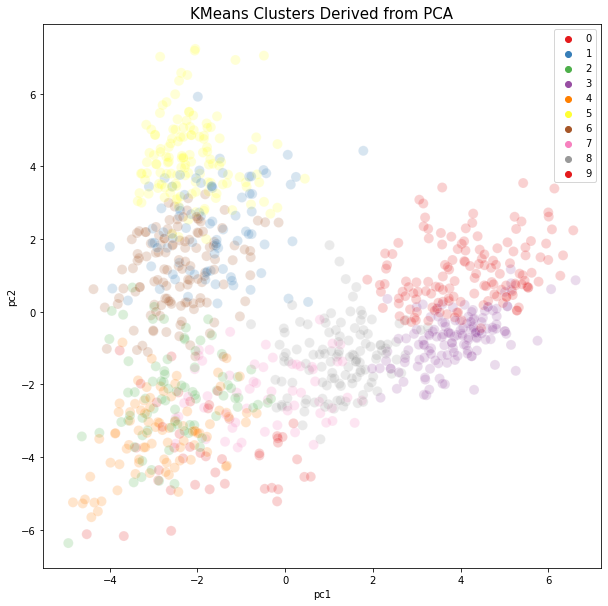

In [72]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters Derived from PCA', fontsize=15)
plt.legend()
plt.show()

In [73]:
kmeans_score_pca = cluster_accuracy(pca_scaled_feature_d, y_km, enc_target)
kmeans_score_pca

(0.2056423422333102, 302.90009142658107)

In [74]:
for i in range(2):
  print("Cluster " + str(i))
  print(dataset[y_km == i].sample(5))

Cluster 0
            filename       tempo  beats  ...    mfcc19    mfcc20   label
639   metal.00018.au   99.384014     50  ...  3.086148  0.176513   metal
633   metal.00084.au  151.999081     70  ... -4.180146  2.552645   metal
439  hiphop.00009.au  103.359375     49  ...  0.087180  4.004009  hiphop
669   metal.00077.au  151.999081     74  ... -5.783411  1.328284   metal
63    blues.00044.au  135.999178     66  ... -5.126619  3.303441   blues

[5 rows x 30 columns]
Cluster 1
            filename       tempo  beats  ...    mfcc19    mfcc20   label
909    rock.00027.au  151.999081     75  ... -2.339703 -4.321177    rock
777     pop.00029.au  161.499023     79  ...  0.737947 -0.044849     pop
828  reggae.00082.au   99.384014     49  ... -1.549520 -1.283727  reggae
344   disco.00040.au  135.999178     68  ...  1.896354 -0.615295   disco
841  reggae.00056.au  161.499023     76  ...  1.407165  2.234649  reggae

[5 rows x 30 columns]


### K means with T-SNE

In [75]:
km_cluster_tsne = KMeans(n_clusters=10,init='k-means++', random_state=42)
km_cluster_tsne.fit(tsne_scaled_features_d)
labels_tsne_scale = km_cluster_tsne.labels_
y_km_tsne = km_cluster_tsne.predict(tsne_scaled_features_d)
clusters_tsne_scale = pd.concat([tsne_scaled_features_d, pd.DataFrame({'pca_clusters_tsne':y_km_tsne})], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


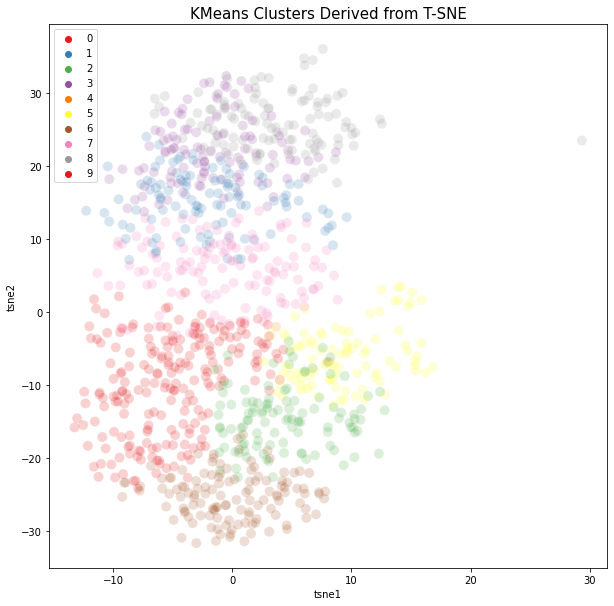

In [76]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1], hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters Derived from T-SNE', fontsize=15)
plt.legend()
plt.show()

In [77]:
kmeans_score_tsne=cluster_accuracy(tsne_scaled_features_d, y_km_tsne, enc_target)
kmeans_score_tsne

(0.29418284, 827.0506294942024)

In [78]:
for i in range(2):
  print("Cluster " + str(i))
  print(dataset[y_km_tsne == i].head(5))

Cluster 0
               filename       tempo  beats  ...    mfcc19    mfcc20      label
66       blues.00052.au  151.999081     73  ... -3.866575  1.316515      blues
182  classical.00051.au  135.999178     40  ... -1.440900  2.739942  classical
202    country.00006.au  112.347147     55  ... -2.753659 -2.114731    country
205    country.00000.au   86.132812     42  ...  0.928209  4.090144    country
208    country.00004.au  117.453835     54  ... -5.440013  1.827359    country

[5 rows x 30 columns]
Cluster 1
          filename       tempo  beats  ...    mfcc19    mfcc20  label
12  blues.00040.au  172.265625     83  ... -4.856884  1.854516  blues
16  blues.00071.au   73.828125     35  ... -6.189024  2.994841  blues
17  blues.00080.au  117.453835     54  ... -5.417520  0.024244  blues
29  blues.00049.au  123.046875     59  ... -2.344157 -0.705606  blues
31  blues.00048.au  123.046875     58  ... -1.909089 -3.128308  blues

[5 rows x 30 columns]


## Modelling Result Analysis

In [79]:
kmeansAnalysis={}
kmeansAnalysis['Category'] = ['Scaled K means without dimension reduction','K means with PCA', 'K means with TSNE']
kmeansAnalysis['silhouette_score'] = [kmeans_score_s[0],kmeans_score_pca[0], kmeans_score_tsne[0]]
kmeansAnalysis['calinski_harabasz_score'] = [kmeans_score_s[1],kmeans_score_pca[1], kmeans_score_tsne[1]]
pd.DataFrame(kmeansAnalysis)

,Category,silhouette_score,calinski_harabasz_score
0,Scaled K means without dimension reduction,0.122989,142.489974
1,K means with PCA,0.205642,302.900091
2,K means with TSNE,0.294183,827.050629


In [80]:
logistic_reg = {}
logistic_reg['category']=['LG without scaling', 'LG scaled data without dimension reduction', 'Scaled LG with PCA', 'Scaled LG with T-SNE']
logistic_reg['Accuracy'] = [lg_score[0], logreg_score[0], log_pca[0], log_tsne[0]]
logistic_reg['Precision'] = [lg_score[1], logreg_score[1], log_pca[1], log_tsne[1]]
logistic_reg['Recall'] = [lg_score[2], logreg_score[2], log_pca[2], log_tsne[2]]
logistic_reg['F1'] = [lg_score[3], logreg_score[3], log_pca[3], log_tsne[3]]
pd.DataFrame(logistic_reg)


,category,Accuracy,Precision,Recall,F1
0,LG without scaling,0.50,0.495643,0.50,0.480765
1,LG scaled data without dimension reduction,0.69,0.697278,0.69,0.688041
2,Scaled LG with PCA,0.42,0.394021,0.42,0.388222
3,Scaled LG with T-SNE,0.33,0.279312,0.33,0.295465


## Evaluation Criteria

- PCA/TSNE performed correctly and results analyzed
- Clustering done correctly and results analyzed
- Adherence to the requirements
- Model trained on given data and its performance evaluated
- Code quality


## Sample correction questions

During a correction, you may get asked questions that test your understanding of covered topics.

- What does a PCA do? How are principal components selected?
- Explain linear regression. What are the main assumptions of linear regression?
- What is K-means clustering? How does it work?
- When would you prefer T-SNE over. PCA?